<a href="https://colab.research.google.com/github/RokelisK123/gilusis/blob/main/Furniturecsv_Decision_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading in dataset (same one as in 1.3).

In [ ]:
import pandas as pd
df_all_col = pd.read_csv('https://raw.githubusercontent.com/RokelisK123/gilusis/main/Furniture-1.csv', sep=',')
print(f"The dataframe has {df_all_col.shape[0]} rows and {df_all_col.shape[1]} columns.")

The dataframe has 2500 rows and 15 columns.


In [ ]:
df_J = df_all_col
df_J

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


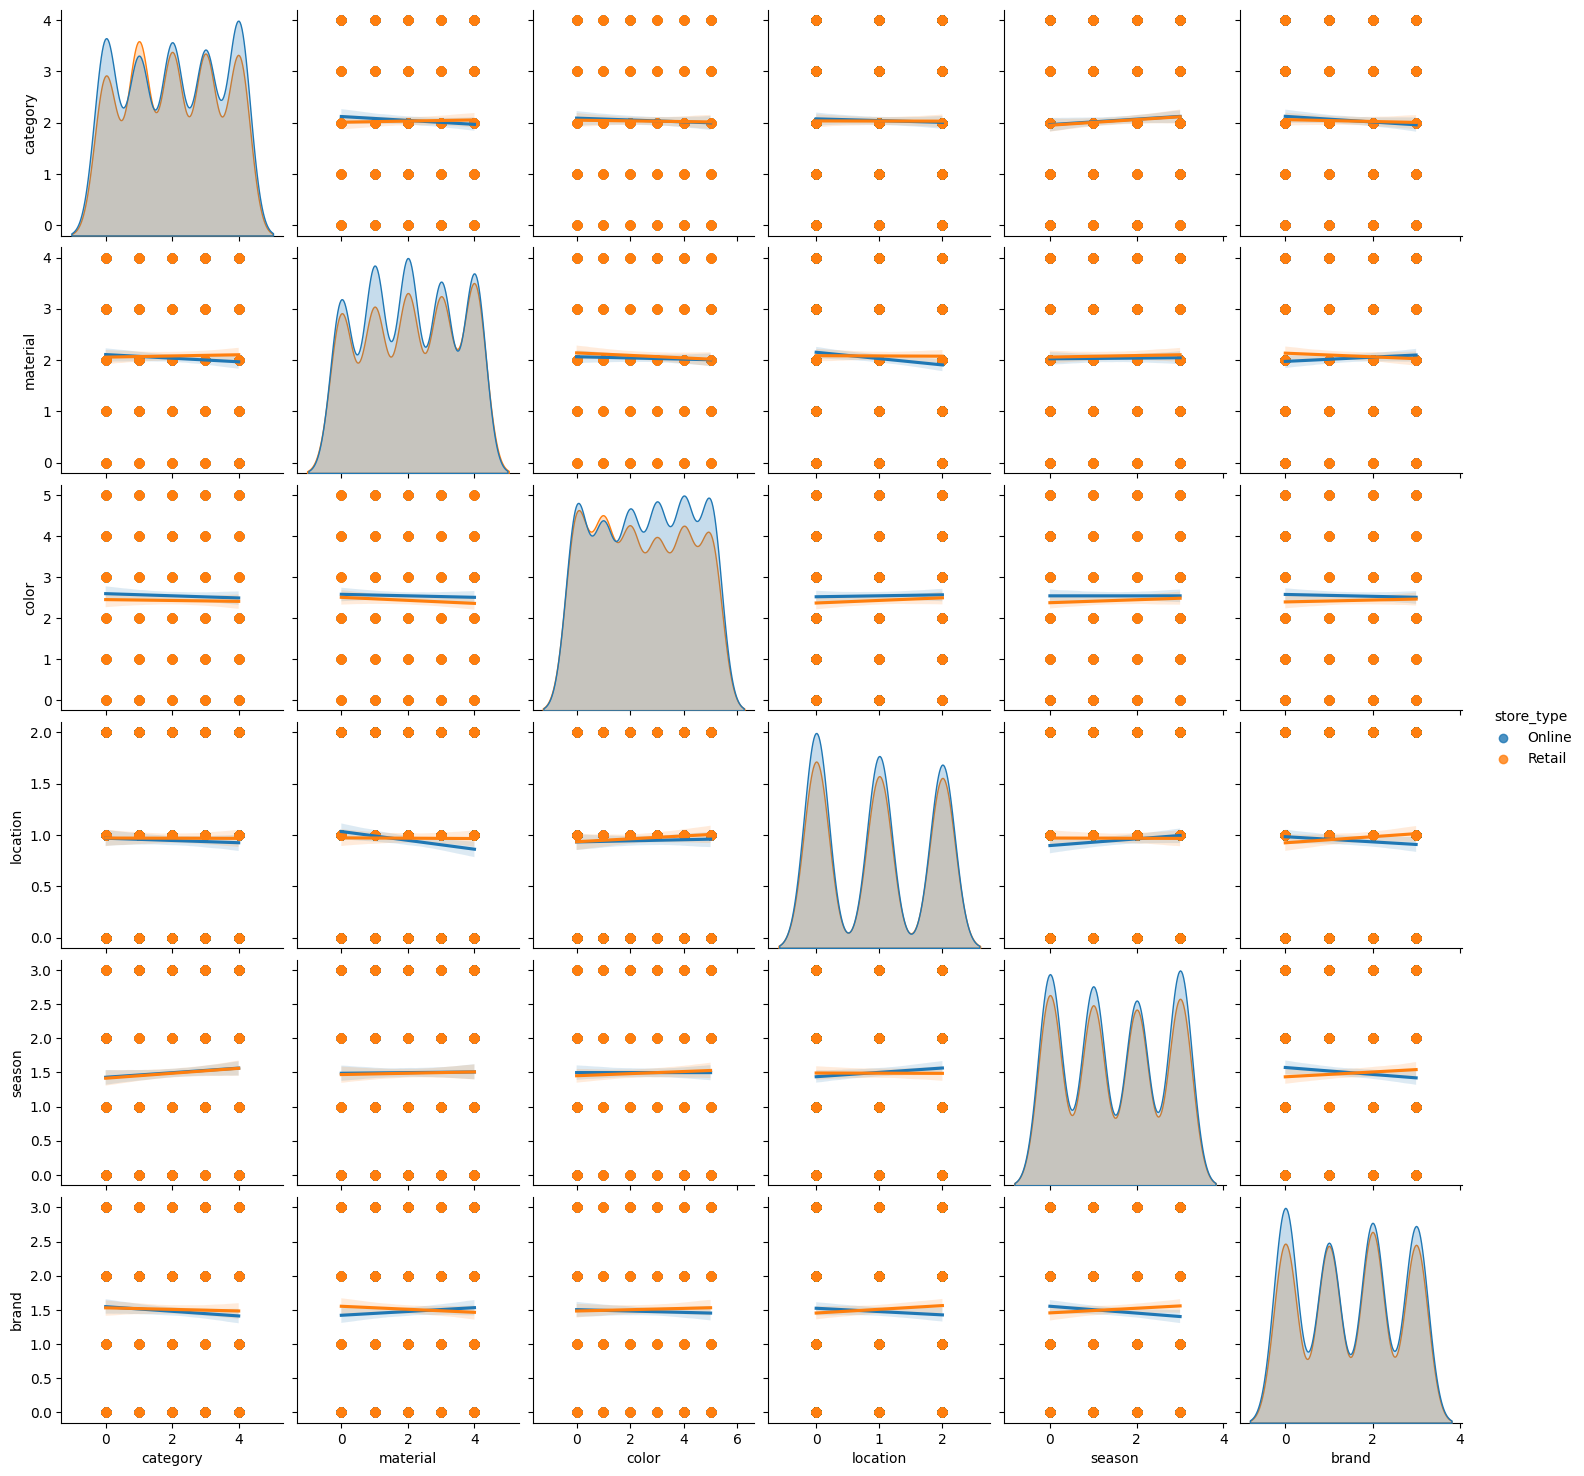

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df_J2 = df_J.loc[:, ['category', 'material', 'color', 'location', 'season','store_type', 'brand']]
# Encode categorical variables into numeric form
df_J2['category'] = LabelEncoder().fit_transform(df_J['category'])
df_J2['material'] = LabelEncoder().fit_transform(df_J['material'])
df_J2['color'] = LabelEncoder().fit_transform(df_J['color'])
df_J2['location'] = LabelEncoder().fit_transform(df_J['location'])
df_J2['season'] = LabelEncoder().fit_transform(df_J['season'])
df_J2['brand'] = LabelEncoder().fit_transform(df_J['brand'])
#dfJ_numeric = df_J2[['category', 'material', 'color', 'location','season','store_type','brand']]

# Plot pairplot
sns.pairplot(df_J2, kind='reg', hue="store_type")
plt.show()



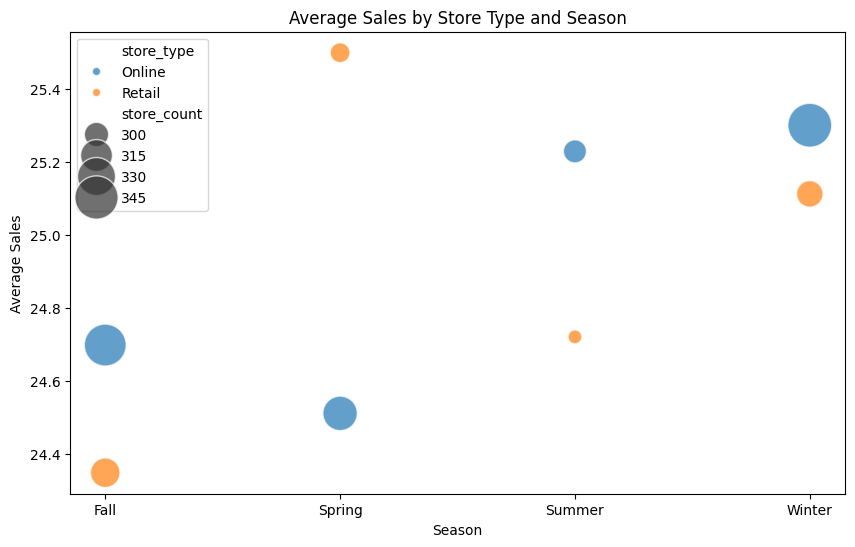

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

counts = df_J.groupby(['store_type', 'season']).agg(
    avg_sales=('sales', 'mean'),
    store_count=('store_type', 'size')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=counts, x='season', y='avg_sales', hue='store_type', size='store_count',
                sizes=(100, 1000), legend='brief', alpha=0.7)

plt.title('Average Sales by Store Type and Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
counts

,store_type,season,avg_sales,store_count
0,Online,Fall,24.697947,341
1,Online,Spring,24.510903,321
2,Online,Summer,25.228188,298
3,Online,Winter,25.299712,347
4,Retail,Fall,24.348387,310
5,Retail,Spring,25.498294,293
6,Retail,Summer,24.720280,286
7,Retail,Winter,25.111842,304


Text(0.5, 1.0, 'Distribution of Experience Level by Salary Bins')

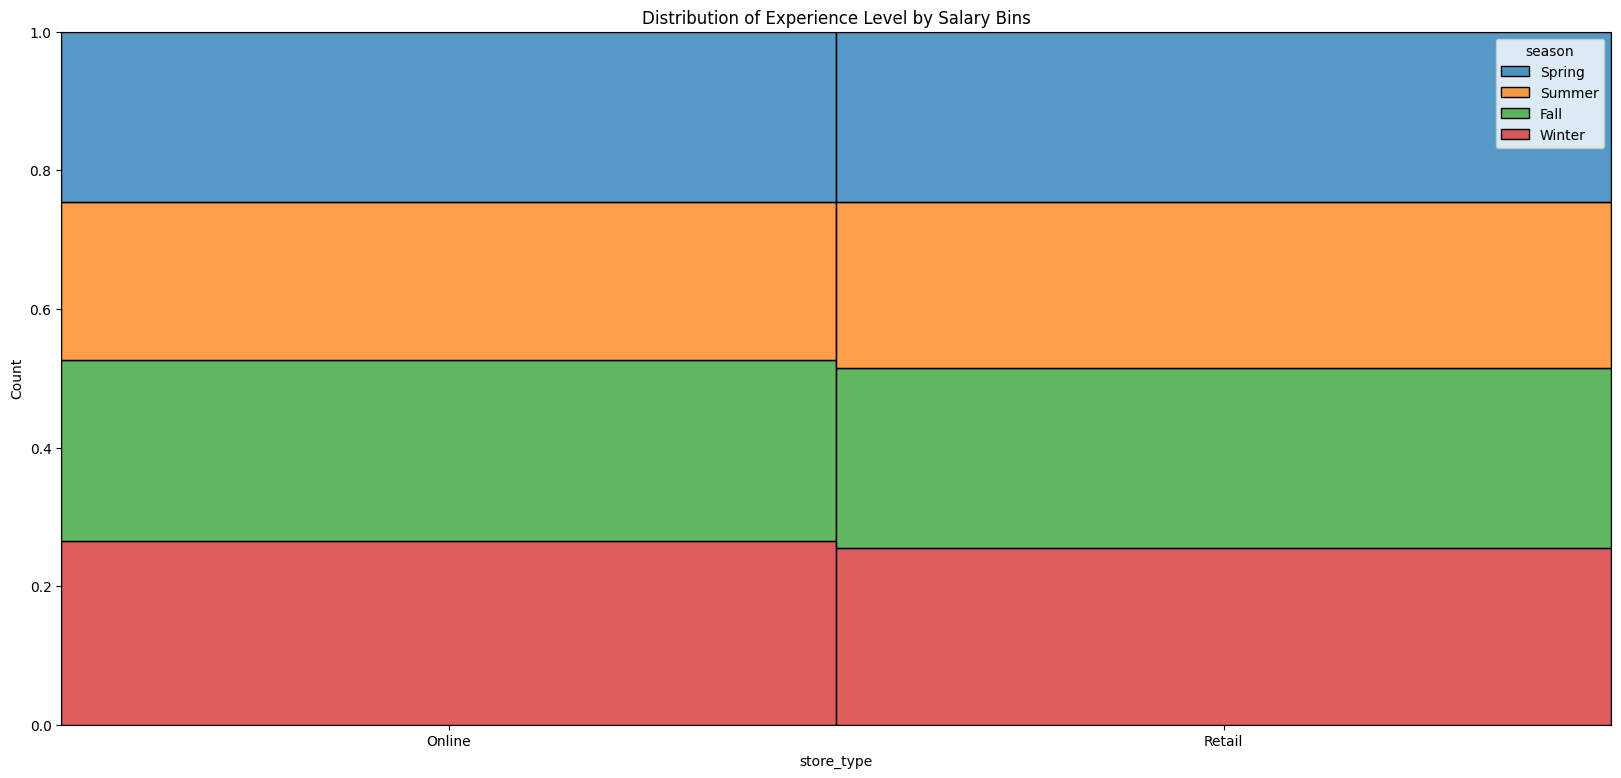

In [ ]:
import matplotlib.pyplot as plt
 # Adjust number of bins as needed

# Plot the data
plt.figure(figsize=(20,9))
sns.histplot(x='store_type', hue='season', data=df_J,binwidth=1, multiple='fill')
plt.title('Distribution of Experience Level by Salary Bins')


<Axes: xlabel='store_type', ylabel='Count'>

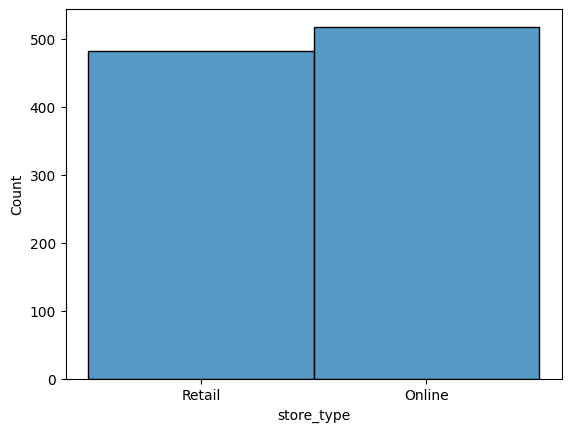

In [ ]:
df_random = df_J.sample(n=1000, random_state=42)
sns.histplot(x='store_type', data=df_random)

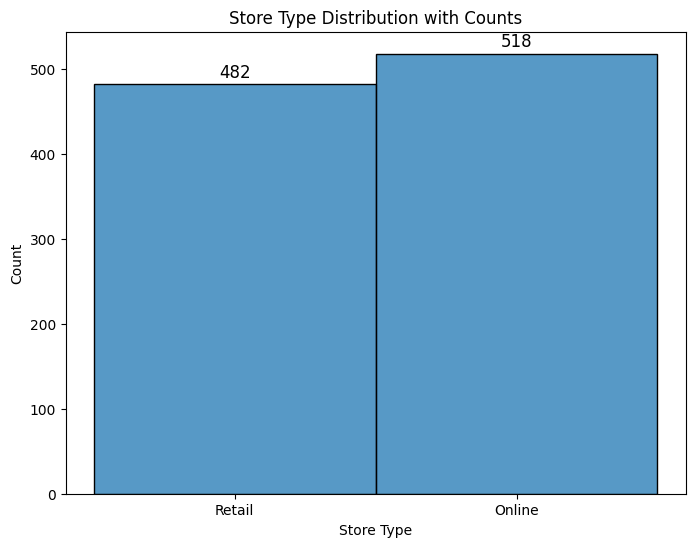

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_random = df_J.sample(n=1000, random_state=42)

plt.figure(figsize=(8, 6))
ax = sns.histplot(x='store_type', data=df_random, discrete=True)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Store Type Distribution with Counts')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='store_type', ylabel='Count'>

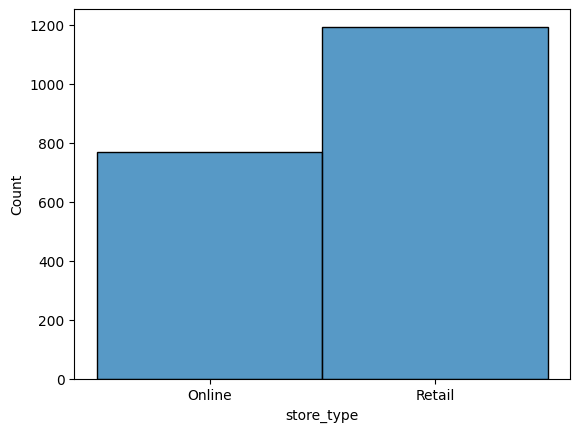

In [ ]:
df3 = df_J.query("store_type == 'Retail' or store_type == 'Online' and sales > 20")
sns.histplot(x="store_type"  , data=df3)


In [ ]:
average_revenue = df_J.groupby(["season", "location","store_type"])["revenue"].mean().reset_index().sort_values(by='revenue', ascending=False)
average_revenue

,season,location,store_type,revenue
11,Spring,Urban,Retail,7243.936969
15,Summer,Suburban,Retail,6956.757677
6,Spring,Rural,Online,6516.533145
8,Spring,Suburban,Online,6391.421828
9,Spring,Suburban,Retail,6383.130386
20,Winter,Suburban,Online,6332.368319
1,Fall,Rural,Retail,6272.065613
13,Summer,Rural,Retail,6256.975560
0,Fall,Rural,Online,6253.018102
3,Fall,Suburban,Retail,6200.810369


<ipython-input-11-cd2940362d8a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_revenue,


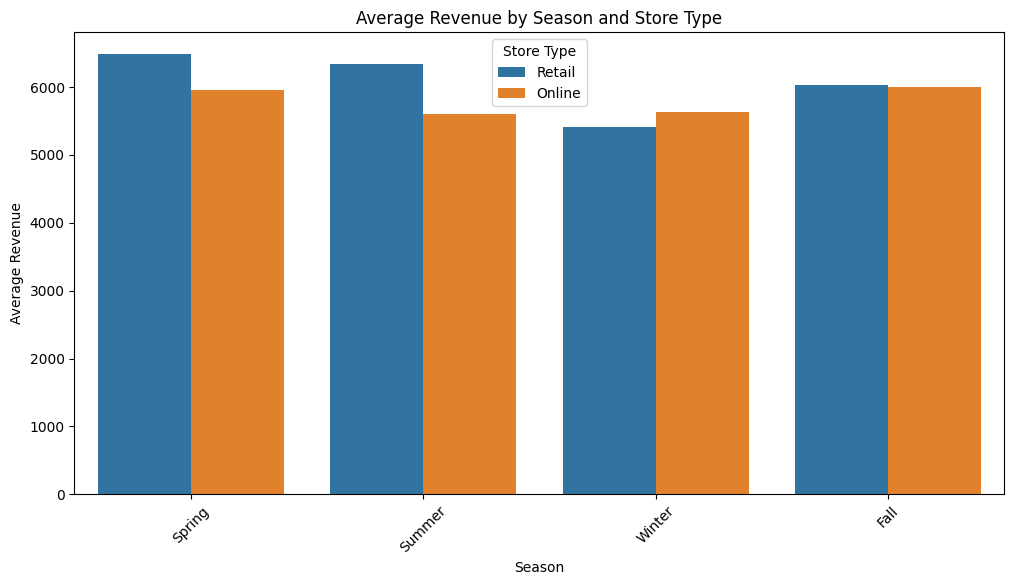

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=average_revenue,
            x='season',
            y='revenue',
            hue='store_type',
            ci=None)

plt.title('Average Revenue by Season and Store Type')
plt.xlabel('Season')
plt.ylabel('Average Revenue')
plt.legend(title='Store Type')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

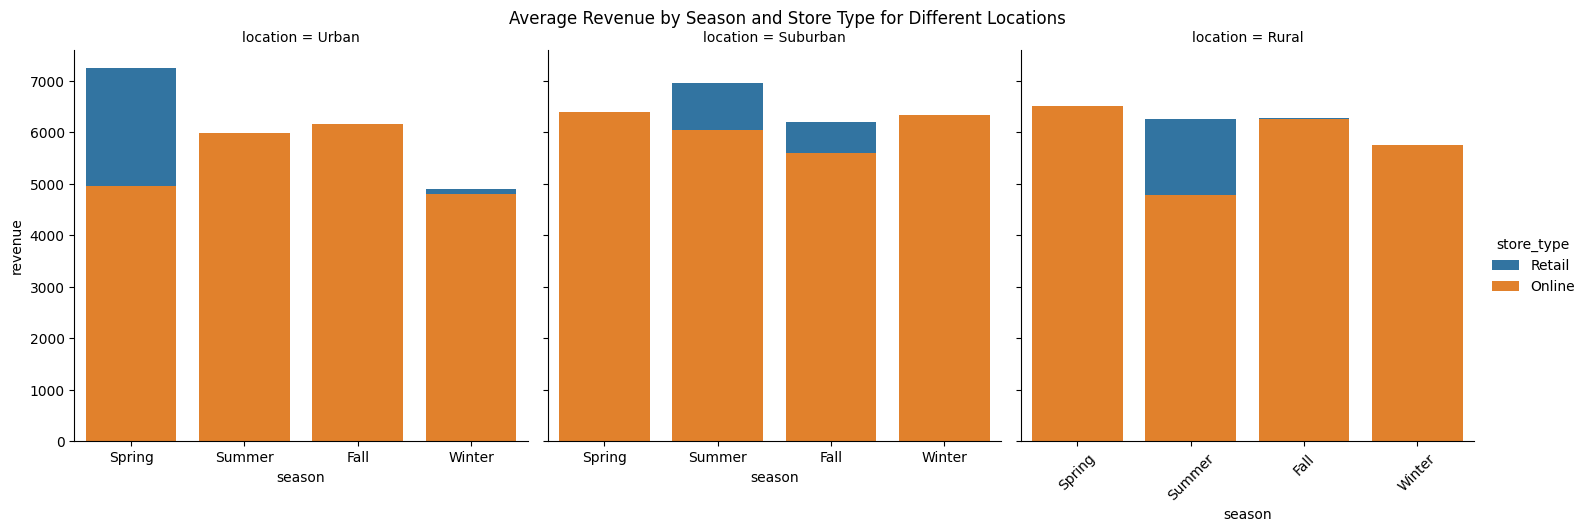

In [ ]:
g = sns.FacetGrid(average_revenue, col='location', hue='store_type', height=5, aspect=1)
g.map(sns.barplot, 'season', 'revenue', ci=None)
g.add_legend()

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average Revenue by Season and Store Type for Different Locations')
plt.xticks(rotation=45)
plt.show()

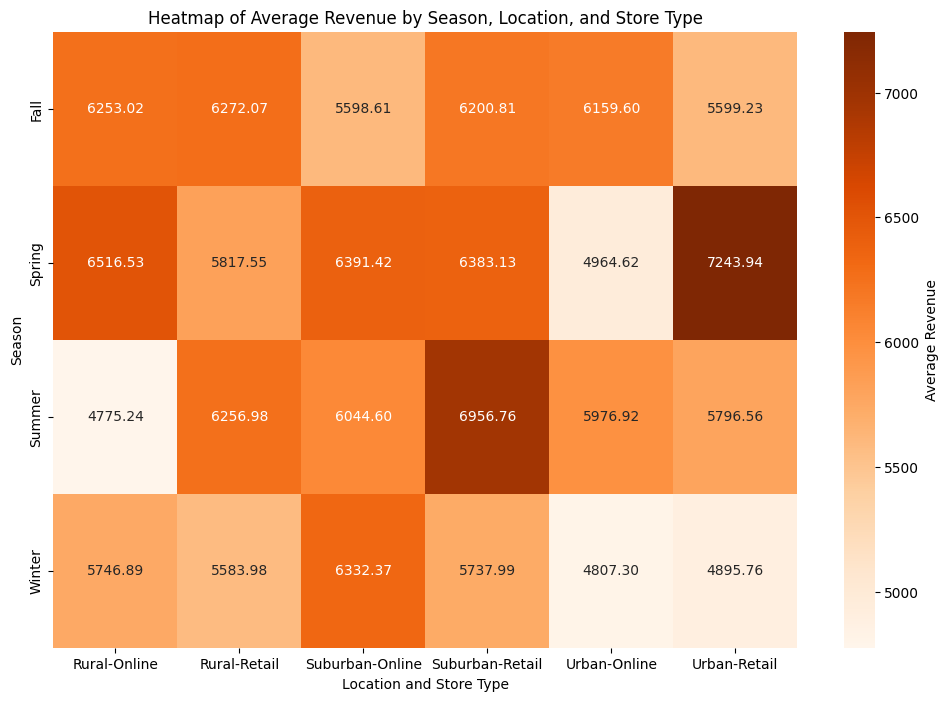

In [ ]:
heatmap_data = average_revenue.pivot_table(values='revenue', index='season', columns=['location', 'store_type'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Oranges", cbar_kws={'label': 'Average Revenue'})
plt.title('Heatmap of Average Revenue by Season, Location, and Store Type')
plt.xlabel('Location and Store Type')
plt.ylabel('Season')
plt.show()

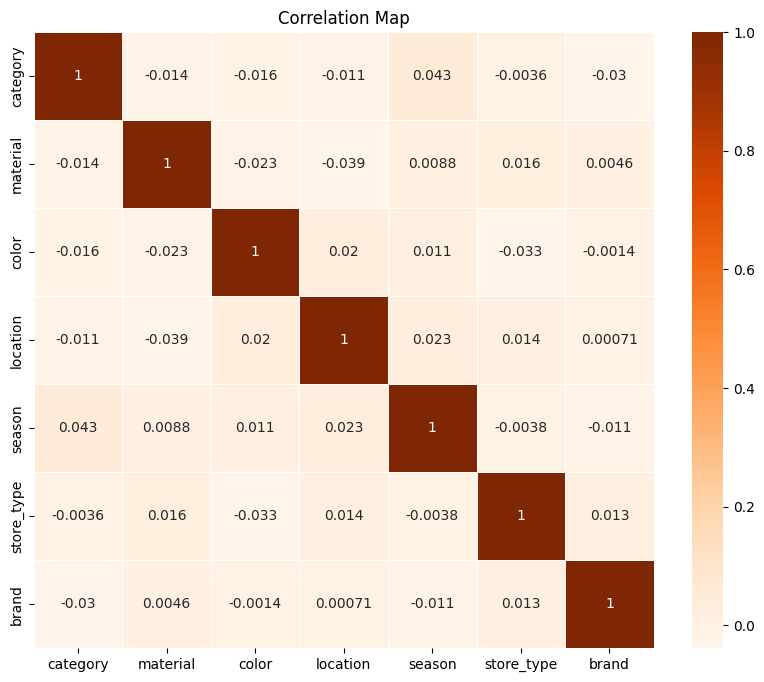

In [ ]:
df_J2['store_type'] = LabelEncoder().fit_transform(df_J['store_type'])
corr_matrix = df_J2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

Pick out which columns are relevant and useful.
The goal is to predict whether or not an item is going to be bought online.


In [ ]:
print(df_all_col.iloc[10])

price                    59.263022
cost                     31.112082
sales                           48
profit_margin            47.501696
inventory                       38
discount_percentage        4.89344
delivery_days                    1
category                      Sofa
material                   Plastic
color                        Green
location                     Urban
season                      Spring
store_type                  Online
brand                       BrandB
revenue                1201.731751
Name: 10, dtype: object


Removing the columns that aren't needed.

In [ ]:
df = df_all_col.copy()
df.drop(columns=["cost", "profit_margin", "color", "revenue", "inventory"], inplace=True)

Convert target column (store_type) from string to int

In [ ]:
df['store_type'] = (df['store_type'] == "Online").astype(int)
df['store_type']

,store_type
0,1
1,1
2,1
3,0
4,1
...,...
2495,0
2496,0
2497,1
2498,0


Splitting the df into training and testing sets.

In [ ]:
import numpy as np
training, testing = np.split(df.sample(frac=1), [ int(0.9*len(df))])
print(f"{len(training)} training examples ({len(training)/len(df)*100}% of data)")
print(f"{len(testing)} test examples ({len(testing)/len(df)*100}% of data)")

2250 training examples (90.0% of data)
250 test examples (10.0% of data)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Install required library (if not already installed)

In [ ]:
# !pip install tensorflow_decision_forests==1.4.0

In [ ]:
import tensorflow_decision_forests as tfdf
training_ds = tfdf.keras.pd_dataframe_to_tf_dataset(training, label='store_type')
testing_ds = tfdf.keras.pd_dataframe_to_tf_dataset(testing, label='store_type')

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

In [ ]:
model = tfdf.keras.RandomForestModel(num_trees=100 , max_depth=15)

In [ ]:
model.fit(training_ds)

# Inference

Save and load model

In [ ]:
model.save("Furniturecsv_RandomForestModel_trees150")
import tensorflow as tf
loaded_model = tf.keras.models.load_model("Furniturecsv_RandomForestModel_trees150")

Create sample data (Imported from 1.3)

In [ ]:
sample = {
    "price": 449.99,
    "sales": 20,
    "delivery_days": 5,
    "discount_percentage": 15.7,
    "category": "Desk",
    "material": "Glass",
    "location": "Urban",
    "season": "Winter",
    "brand": "BrandD"
}

Predict sample data

In [ ]:
prediction_sample = tfdf.keras.pd_dataframe_to_tf_dataset(pd.DataFrame([sample]))
prediction = loaded_model.predict(prediction_sample)
print(prediction)

# Visualizing decision tree

Import library (if not already imported)

In [ ]:
!pip install dtreeviz

In [ ]:
import dtreeviz
from matplotlib import pyplot as plt
from IPython import display

# avoid "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

display.set_matplotlib_formats('retina') # generate hires plots

In [ ]:
features = [f.name for f in model.make_inspector().features()]
viz_cmodel = dtreeviz.model(model,
                           tree_index=0,
                           X_train=training[features],
                           y_train=training['store_type'],
                           feature_names=features,
                           target_name='store_type',
                           class_names=[0,1]) # 0 - Retail, 1 - Online

In [ ]:
viz_cmodel.view(scale=1)

In [ ]:
x = training[features].iloc[10]
viz_cmodel.view(x=x, scale=.75)